# Isolation Forest / Clustering over printer features

## Install required packages

In [1]:
if (!require("stringr")) { install.packages("stringr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("magrittr")) { install.packages("magrittr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("readr")) { install.packages("readr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("readr")) { install.packages("readr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("lubridate")) { install.packages("lubridate", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("tidyr")) { install.packages("tidyr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("dplyr")) { install.packages("dplyr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("zoo")) { install.packages("zoo", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("purrr")) { install.packages("purrr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("psych")) { install.packages("psych", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("data.table")) { install.packages("data.table", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("moments")) { install.packages("moments", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("h2o")) { install.packages("h2o", type="source", lib='/R/library', repos=(c("http://h2o-release.s3.amazonaws.com/h2o/rel-turin/4/R"))) }
if (!require("IsolationForest")) { install.packages("IsolationForest", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("plotrix")) { install.packages("plotrix", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("clValid")) { install.packages("clValid", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("methods" %in% rownames(installed.packages()))) { install.packages("methods", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("statmod" %in% rownames(installed.packages()))) { install.packages("statmod", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("stats" %in% rownames(installed.packages()))) { install.packages("stats", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("graphics" %in% rownames(installed.packages()))) { install.packages("graphics", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("RCurl" %in% rownames(installed.packages()))) { install.packages("RCurl", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("jsonlite" %in% rownames(installed.packages()))) { install.packages("jsonlite", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("tools" %in% rownames(installed.packages()))) { install.packages("tools", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("utils" %in% rownames(installed.packages()))) { install.packages("utils", lib='/R/library', repos='http://cran.us.r-project.org') }

Loading required package: stringr
Loading required package: magrittr
Loading required package: readr
Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Loading required package: tidyr

Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: purrr

Attaching package: ‘purrr’

The following object is masked from ‘package:dplyr’:

    order_by

The following object is masked from ‘package

IsolationForest 0.0-26 


Loading required package: plotrix

Attaching package: ‘plotrix’

The following object is masked from ‘package:psych’:

    rescale

Loading required package: clValid
Loading required package: cluster


## Initialize h2o

In [2]:
library(h2o)
h2o.init(ip = "15.8.169.215", port = 54321, startH2O = F)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         11 days 22 hours 
    H2O cluster version:        3.8.3.4 
    H2O cluster name:           root 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   0.37 GB 
    H2O cluster total cores:    32 
    H2O cluster allowed cores:  32 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          15.8.169.215 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    R Version:                  R version 3.3.1 (2016-06-21) 



## Load data

In [3]:
load('IndigoData.dat')

In [4]:
glimpse(data)

Observations: 1,211,693
Variables: 22
$ event_RowNumber (dbl) 15765585098, 15765585142, 15765585284, 15765585445,...
$ event_press     (int) 45000586, 45000586, 45000586, 45000586, 45000586, 4...
$ Product_Line    (fctr) HP Indigo 7600, HP Indigo 7600, HP Indigo 7600, HP...
$ series          (fctr) 7000 Family Sheet Fed Commercial Press, 7000 Famil...
$ Region          (fctr) North America, North America, North America, North...
$ SubRegion       (fctr) MidAtlantic United States, MidAtlantic United Stat...
$ District        (fctr) UNITED STATES, UNITED STATES, UNITED STATES, UNITE...
$ Ownership       (fctr) DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, DI...
$ event_recNum    (int) 739828, 739878, 740037, 740221, 740224, 740554, 740...
$ event_date      (chr) "2016-06-08 00:00:00.000", "2016-06-08 00:00:00.000...
$ event_time      (int) 74703, 75903, 84709, 93603, 95930, 120644, 132213, ...
$ event_name      (fctr) SAMPLE_PIP_AND_IMO_PARAMETERS, SAMPLE_PIP_AND_IMO_...
$ event_state 

## Data preprocessing

### Replace vesse_flow and IO_Conductivity for presence columns

In [5]:
mapped_data <- data %>%
    mutate(vessel_flow_presence = as.numeric(!is.na(vessel_flow)), io_cond_presence = as.numeric(!is.na(IO_Conductivity))) %>%
    select(-vessel_flow,-IO_Conductivity)    

In [6]:
glimpse(mapped_data)

Observations: 1,211,693
Variables: 22
$ event_RowNumber      (dbl) 15765585098, 15765585142, 15765585284, 1576558...
$ event_press          (int) 45000586, 45000586, 45000586, 45000586, 450005...
$ Product_Line         (fctr) HP Indigo 7600, HP Indigo 7600, HP Indigo 760...
$ series               (fctr) 7000 Family Sheet Fed Commercial Press, 7000 ...
$ Region               (fctr) North America, North America, North America, ...
$ SubRegion            (fctr) MidAtlantic United States, MidAtlantic United...
$ District             (fctr) UNITED STATES, UNITED STATES, UNITED STATES, ...
$ Ownership            (fctr) DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, DIREC...
$ event_recNum         (int) 739828, 739878, 740037, 740221, 740224, 740554...
$ event_date           (chr) "2016-06-08 00:00:00.000", "2016-06-08 00:00:0...
$ event_time           (int) 74703, 75903, 84709, 93603, 95930, 120644, 132...
$ event_name           (fctr) SAMPLE_PIP_AND_IMO_PARAMETERS, SAMPLE_PIP_AND...
$ event_state 

### Filter event by PRINT_STATE and remove uneeded columns

In [7]:
mapped_data2 <- mapped_data %>%
    filter(event_state == "PRINT_STATE") %>%
    select(-event_RowNumber, -(3:13), -SWv)    

In [8]:
glimpse(mapped_data2)

Observations: 203,675
Variables: 9
$ event_press          (int) 45000586, 45000586, 45000202, 45000202, 450002...
$ full_time            (time) 2016-06-08 07:47:03, 2016-06-08 07:59:03, 201...
$ PIP_Temperature      (int) 302, 298, 281, 271, 281, 281, 280, 284, 280, 2...
$ IO_temperature       (int) 242, 243, 270, 257, 248, 248, 247, 245, 246, 2...
$ IO_dirtiness         (int) 825, 825, 987, 987, 987, 987, 987, 987, 987, 9...
$ CS_Voltage           (int) 1846, 1846, 1954, 1954, 1954, 1954, 1954, 1954...
$ Delta_Pressure       (int) 64, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ vessel_flow_presence (dbl) 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ io_cond_presence     (dbl) 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...


## Detect anomalies with IsolationForest

### Training

In [10]:
trained_data <- mapped_data2 %>%
    select(-event_press, -full_time)

iforest_model <- IsolationTrees(trained_data, rFactor = 0)

### Prediction

In [11]:
anom_scores <- AnomalyScore(trained_data, iforest_model)

In [13]:
df_pred <- mapped_data2 %>%
    mutate(anom_score = as.vector(anom_scores$outF)) %>%
    arrange(desc(anom_score))

In [14]:
## Visualize the 30 most anomalous observations
head(df_pred, 10)

ERROR: Error in vapply(df, class, FUN.VALUE = character(1L)): values must be length 1,
 but FUN(X[[2]]) result is length 2


   event_press           full_time PIP_Temperature IO_temperature IO_dirtiness
1     45000051 2016-02-08 11:36:23             321            290          667
2     43000013 2016-04-04 19:16:25             280            251           74
3     40000404 2016-04-23 16:36:42             271            286           47
4     45000353 2016-06-01 08:26:23             280            220           16
5     43000330 2016-03-03 02:50:56             368            353           50
6     43000330 2016-03-03 03:02:56             374            353           52
7     40000042 2016-05-02 16:02:44             262            282           43
8     40000207 2016-03-02 21:16:08             278            245           20
9     40000109 2016-06-09 10:53:58             282            291           69
10    40000109 2016-06-09 16:35:37             283            288           75
   CS_Voltage Delta_Pressure vessel_flow_presence io_cond_presence anom_score
1        1750             64                    0    

In [15]:
head( df_pred %>%
    top_n(2000) %>%
    group_by(event_press) %>%
    summarise(events = as.integer(n()), max_anom = max(anom_score), min_anom = min(anom_score)) %>%
    arrange(desc(max_anom)), 30)

Selecting by anom_score


,event_press,events,max_anom,min_anom
1,4.000040e+07,8.700000e+01,8.384490e-01,8.141844e-01
2,4.300001e+07,1.000000e+00,8.384490e-01,8.384490e-01
3,4.500005e+07,1.000000e+00,8.384490e-01,8.384490e-01
4,4.500035e+07,2.000000e+00,8.384490e-01,8.141844e-01
5,4.000003e+07,9.300000e+01,8.141844e-01,8.141844e-01
6,4.000004e+07,1.400000e+01,8.141844e-01,8.141844e-01
7,4.000007e+07,1.000000e+00,8.141844e-01,8.141844e-01
8,4.000009e+07,1.300000e+01,8.141844e-01,8.141844e-01
9,4.000010e+07,9.100000e+01,8.141844e-01,8.141844e-01
10,4.000011e+07,1.390000e+02,8.141844e-01,8.141844e-01


## Group similar anomalies with clustering

In [16]:
## Remove printers with too much events so to reduce bias from them

### Data normalization

In [17]:
data_size <- nrow(df_pred) * 0.01 # 1 percent most anomalous observations

df_cluster <- df_pred %>%      
    arrange(desc(anom_score)) %>% 
    top_n(data_size) %>%     
    mutate(
        norm_pip_Temperature = PIP_Temperature / max(PIP_Temperature),
        norm_io_temperature = IO_temperature / max(IO_temperature),
        norm_io_dirtiness = IO_dirtiness / max(IO_dirtiness),
        norm_cs_voltage = CS_Voltage / max(CS_Voltage),
        norm_delta_pressure = Delta_Pressure / max(Delta_Pressure))
glimpse(df_cluster)

Selecting by anom_score


Observations: 3,799
Variables: 15
$ event_press          (int) 45000051, 43000013, 40000404, 45000353, 430003...
$ full_time            (time) 2016-02-08 11:36:23, 2016-04-04 19:16:25, 201...
$ PIP_Temperature      (int) 321, 280, 271, 280, 368, 374, 262, 278, 282, 2...
$ IO_temperature       (int) 290, 251, 286, 220, 353, 353, 282, 245, 291, 2...
$ IO_dirtiness         (int) 667, 74, 47, 16, 50, 52, 43, 20, 69, 75, 74, 3...
$ CS_Voltage           (int) 1750, 1869, 2052, 2126, 2500, 2500, 2170, 1800...
$ Delta_Pressure       (int) 64, 64, 64, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ vessel_flow_presence (dbl) 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ io_cond_presence     (dbl) 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ anom_score           (dbl) 0.8384490, 0.8384490, 0.8384490, 0.8384490, 0....
$ norm_pip_Temperature (dbl) 0.7379310, 0.6436782, 0.6229885, 0.6436782, 0....
$ norm_io_temperature  (dbl) 0.6331878, 0.5480349, 0.6244541, 0.4803493, 0....
$ norm_io_dirtines

### Pre-cluster analysis

In [18]:
df_cluster_reduced <- select(df_cluster, 
           vessel_flow_presence, 
           io_cond_presence, 
           norm_pip_Temperature,
           norm_io_temperature,
           norm_io_dirtiness,
           norm_cs_voltage,
           norm_delta_pressure )
df_cluster_reduced <- df_cluster_reduced[ sample(data_size, 600), ]
glimpse(df_cluster_reduced)

Observations: 600
Variables: 7
$ vessel_flow_presence (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ io_cond_presence     (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...
$ norm_pip_Temperature (dbl) 0.6965517, 0.7701149, 0.5264368, 0.5172414, 0....
$ norm_io_temperature  (dbl) 0.6593886, 0.6179039, 0.8231441, 0.8253275, 0....
$ norm_io_dirtiness    (dbl) 0.02581262, 0.06883365, 0.05162524, 0.02772467...
$ norm_cs_voltage      (dbl) 0.8620690, 0.9482759, 0.6206897, 0.6206897, 0....
$ norm_delta_pressure  (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...


In [19]:
internal_validation  <- clValid::clValid(df_cluster_reduced , 2:10, clMethods = c("clara", "kmeans", "hierarchical"), validation = "internal")

In [20]:
summary(internal_validation)


Clustering Methods:
 clara kmeans hierarchical 

Cluster sizes:
 2 3 4 5 6 7 8 9 10 

Validation Measures:
                                 2       3       4       5       6       7       8       9      10
                                                                                                  
clara        Connectivity  34.7869 42.7222 51.1532 44.6663 62.3976 91.0520 85.3643 84.9710 94.1063
             Dunn           0.0034  0.0051  0.0071  0.0069  0.0036  0.0036  0.0043  0.0077  0.0098
             Silhouette     0.3937  0.4931  0.4692  0.4453  0.4337  0.4063  0.4534  0.4449  0.4327
kmeans       Connectivity   6.6325  8.2159 12.0738 15.0028 16.5028 18.5028 21.4317 44.2694 48.8778
             Dunn           0.6453  0.7290  0.7049  0.7978  0.8071  1.0419  0.9013  0.0346  0.0455
             Silhouette     0.8217  0.8070  0.7540  0.7434  0.7426  0.7421  0.5941  0.4252  0.5219
hierarchical Connectivity   4.1913  8.2159 12.0738 15.0028 16.5028 18.5028 21.4317 28.8782 33.3774
 

In [21]:
optimalScores(internal_validation)

,Score,Method,Clusters
Connectivity,4.19126984126984,hierarchical,2
Dunn,1.04190402598063,kmeans,7
Silhouette,0.832726080456406,hierarchical,2


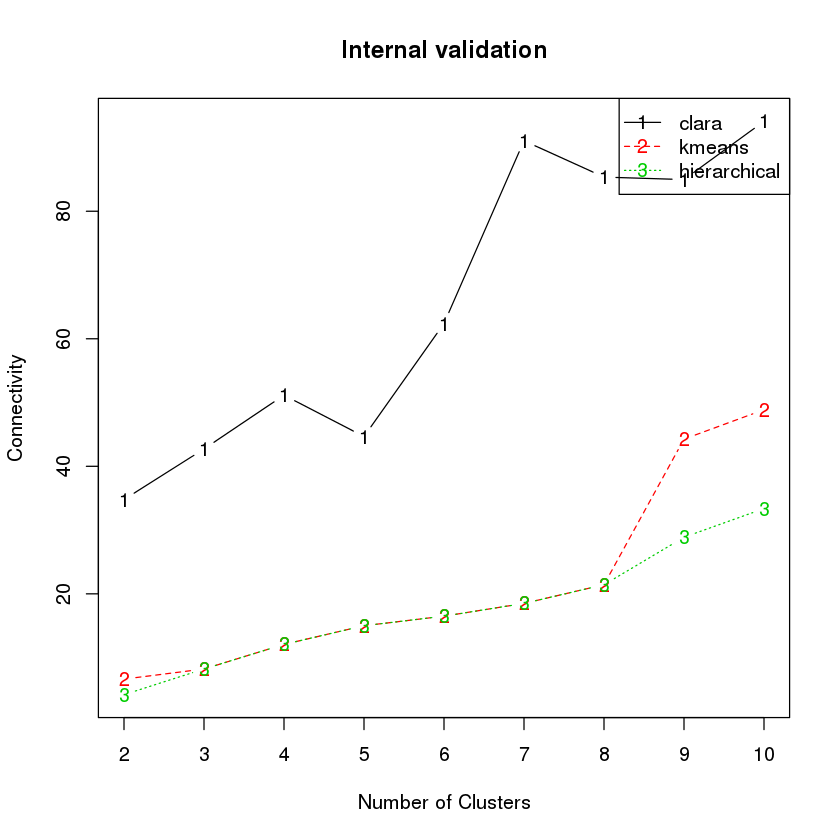

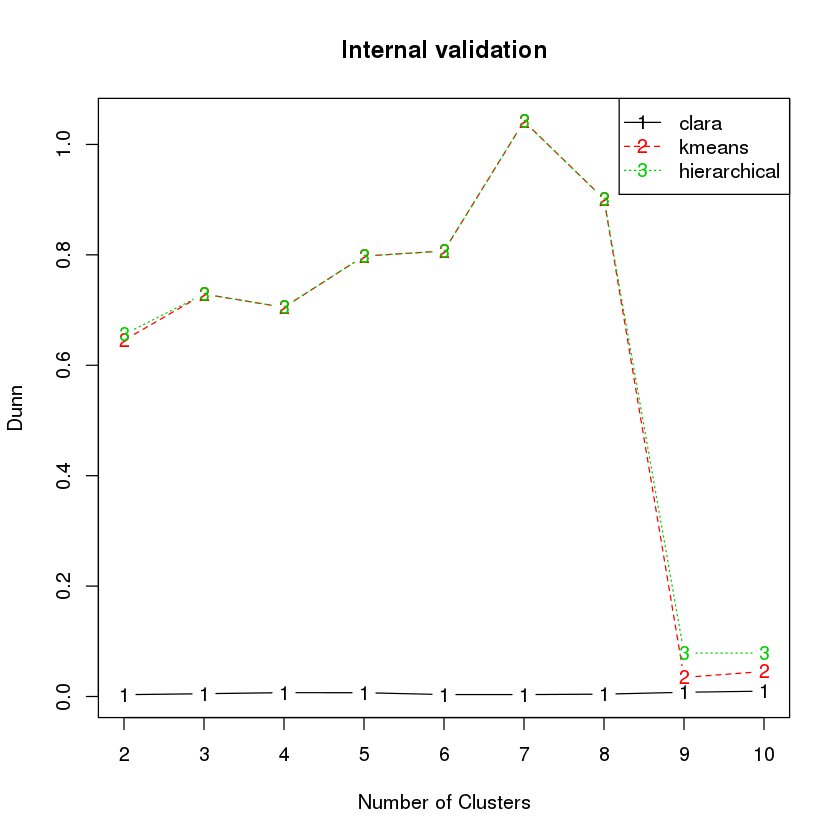

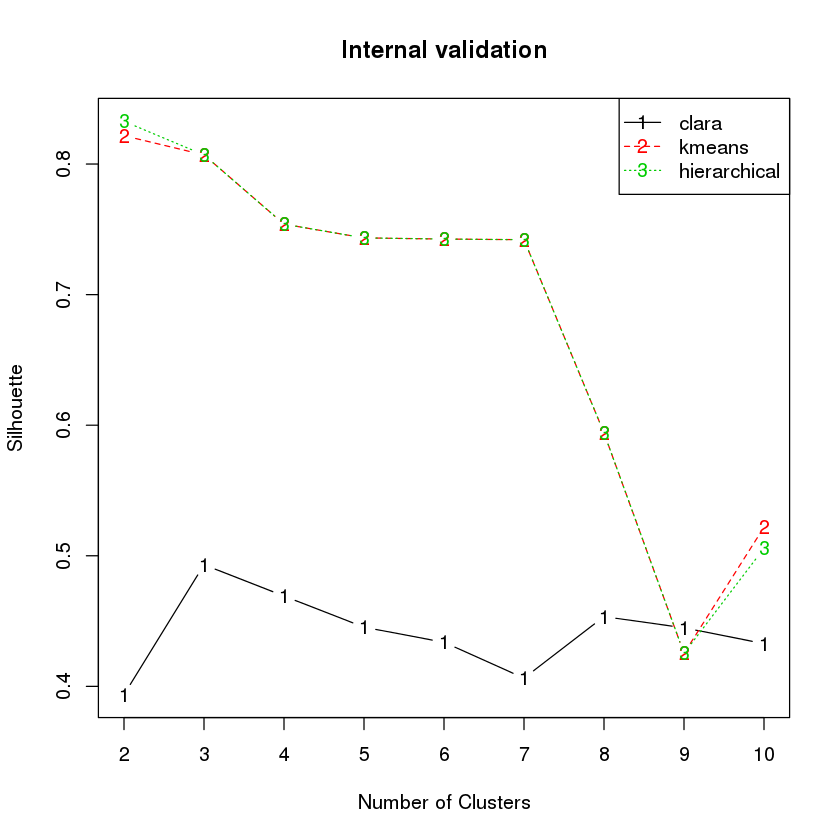

In [22]:
plot(internal_validation)

### K-means clustering with 4 clusters

In [28]:
h2o_cluster <- as.h2o( 
    select(df_cluster, 
           vessel_flow_presence, 
           io_cond_presence, 
           norm_pip_Temperature,
           norm_io_temperature,
           norm_io_dirtiness,
           norm_cs_voltage,
           norm_delta_pressure ))
glimpse(h2o_cluster)

  |======================================================================| 100%
Observations: 3,799
Variables: 7
$ vessel_flow_presence (dbl) 0, 1, 0, 1, 0, 0
$ io_cond_presence     (dbl) 1, 0, 0, 1, 0, 0
$ norm_pip_Temperature (dbl) 0.7379310, 0.6436782, 0.6229885, 0.6436782, 0....
$ norm_io_temperature  (dbl) 0.6331878, 0.5480349, 0.6244541, 0.4803493, 0....
$ norm_io_dirtiness    (dbl) 0.63766730, 0.07074570, 0.04493308, 0.01529637...
$ norm_cs_voltage      (dbl) 0.6034483, 0.6444828, 0.7075862, 0.7331034, 0....
$ norm_delta_pressure  (dbl) 1, 1, 1, 1, 0, 0


In [34]:
cluster_model <- h2o.kmeans(h2o_cluster, k = 2, init = "Random", max_iterations = 10, standardize = TRUE)

  |======================================================================| 100%


In [35]:
cluster_model@model$training_metrics

H2OClusteringMetrics: kmeans
** Reported on training data. **


Total Within SS:  22242.89
Between SS:  4343.108
Total SS:  26586 
Centroid Statistics: 
  centroid       size within_cluster_sum_of_squares
1        1 2037.00000                   19610.62213
2        2 1762.00000                    2632.26983

### Analyzing resulting clusters

In [36]:
cluster_model@model$centers

,centroid,vessel_flow_presence,io_cond_presence,norm_pip_temperature,norm_io_temperature,norm_io_dirtiness,norm_cs_voltage,norm_delta_pressure
1,1,0.00245459008345604,0.00343642611683849,0.597933630141238,0.661637436679079,0.048519689754832,0.658002471518291,0.00441826215022092
2,2,3.03576608295941e-18,-3.03576608295941e-18,0.763772880869441,0.697875825902483,0.0349301050648598,0.893969039884144,1.21430643318376e-17


In [37]:
as.data.frame(cluster_model@model$centers) %>%
    mutate(
        pip_temperature = norm_pip_temperature * max(df_cluster$PIP_Temperature),
        io_temperature = norm_io_temperature * max(df_cluster$IO_temperature),
        io_dirtiness = norm_io_dirtiness * max(df_cluster$IO_dirtiness),
        cs_voltage = norm_cs_voltage * max(df_cluster$CS_Voltage),
        delta_pressure = norm_delta_pressure * max(df_cluster$Delta_Pressure)        
    ) %>%
    select(
        centroid,
        pip_temperature,
        io_temperature,
        io_dirtiness,
        cs_voltage,
        delta_pressure,
        vessel_flow_presence,
        io_cond_presence) %>%
    mutate(
        pip_temperature = round(pip_temperature),
        io_temperature = round(io_temperature),
        io_dirtiness = round(io_dirtiness),
        cs_voltage = round(cs_voltage),
        delta_pressure = round(delta_pressure),
        vessel_flow_presence = round(vessel_flow_presence) ,
        io_cond_presence = round(vessel_flow_presence) )
    

,centroid,pip_temperature,io_temperature,io_dirtiness,cs_voltage,delta_pressure,vessel_flow_presence,io_cond_presence
1,1,260,303,51,1908,0,0,0
2,2,332,320,37,2593,0,0,0


An analysis from the centroids can be summarised with the following table:


| Group Name                                   | Centroid | Comments                                                      |
| -------------------------------------------- |:--------:| --------------------------------------------------------------|
|**Mostly zeroed sensors**| 3 | 272 cases where only PIP_Temperture was working while other sensors had values close to 0.|
|**io_temperature higher than pip_temperature**| 4 | 218 cases with io_temperature higher pip_temperature. |
|**delta pressure higher than 0**| 2 | 1005 cases (almost 50% of total) where only group with delta_pressure higher 0.|
|**unknown pattern group**       | 1 | 541 cases with still unknown pattern from centroid information. |

### Assign cluster to observations

In [345]:
pred <- h2o.predict(cluster_model, h2o_cluster)
glimpse(pred)

  |======================================================================| 100%
Observations: 2,036
Variables: 1
$ predict (dbl) 2, 2, 2, 2, 2, 2


In [346]:
df_cluster$cluster <- as.vector(pred)
glimpse(df_cluster)

Observations: 2,036
Variables: 16
$ event_press          (int) 40000297, 40000144, 40000442, 43000206, 400000...
$ full_time            (time) 2016-02-23 01:34:29, 2016-05-18 13:40:53, 201...
$ PIP_Temperature      (int) 179, 399, 194, 392, 388, 386, 204, 385, 384, 3...
$ IO_temperature       (int) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ IO_dirtiness         (int) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ CS_Voltage           (int) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ Delta_Pressure       (int) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ vessel_flow_presence (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ io_cond_presence     (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ anom_score           (dbl) 0.1351749, 0.1347071, 0.1345908, 0.1344542, 0....
$ norm_pip_Temperature (dbl) 0.4486216, 1.0000000, 0.4862155, 0.9824561, 0....
$ norm_io_temperature  (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ norm_io_dirtines

In [348]:
df_cluster_query <- df_cluster %>%
    select(
        event_press, 
        full_time, 
        anom_score,
        cluster,
        PIP_Temperature, 
        IO_temperature, 
        IO_dirtiness, 
        CS_Voltage, 
        Delta_Pressure, 
        vessel_flow_presence,
        io_cond_presence) %>%
    arrange(desc(anom_score)) %>%
    group_by(cluster)

## Conclusions and recommendations for future work

1. Auto-encoder was trained only with sensor numerical values (not categorical data used this time)

    1.1 Too much one-hot features seems to overcome the importance of the sensor features
    
    1.2 Some categorical columns such as firmware values are very rare to occur and could be interpreted as anomalies by themselves and thus they were removed


2. The 1% most anomalous observations were chosen to be grouped in clusters

    2.1 - Using 1% improved the results of the clustering algorithm perhaps because highly anomalous observations can be better separated. (see subsection Pre-cluster analysis)
    
    2.2 - When more data was used the clustering algorithms didn´t show good results


3. K-means was used as clustering algorithm with number of clusters (k) as suggested by Dunn and Silhouette metrics what lead to better results


4. In subsection Analysing resulting clusters, groups with distinct behaviors were found although one group needs further analysis to understand why it was classified as anomalies


As next steps for future work:

* Randomly choose some anomalies in each group and plot the sensor data for their respective printers in time in other to have a visual understanding about what it means

* Understand the correlation between delta pressure and anomalies

* Understand the correlation between io and pip temperatures in printers

* Perhaps repeat this experiment by normalizing the amount of events per press since presses with lots of events are better learned then presses with fewer events. This difference can be as high as 500.

    
    

In [353]:
library(factoextra)

Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha



K-means clustering with 4 clusters of sizes 272, 1269, 277, 218

Cluster means:
  vessel_flow_presence io_cond_presence norm_pip_Temperature
1            0.0000000                0            0.8059487
2            1.0000000                1            0.7437467
3            1.0000000                1            0.7192530
4            0.9770642                0            0.7275758
  norm_io_temperature norm_io_dirtiness norm_cs_voltage norm_delta_pressure
1           0.0000000        0.00000000       0.0000000                   0
2           0.5096128        0.04483283       0.7778274                   0
3           0.4850444        0.02661098       0.6942399                   1
4           0.7223626        0.97144668       0.7782977                   0

Clustering vector:
   [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

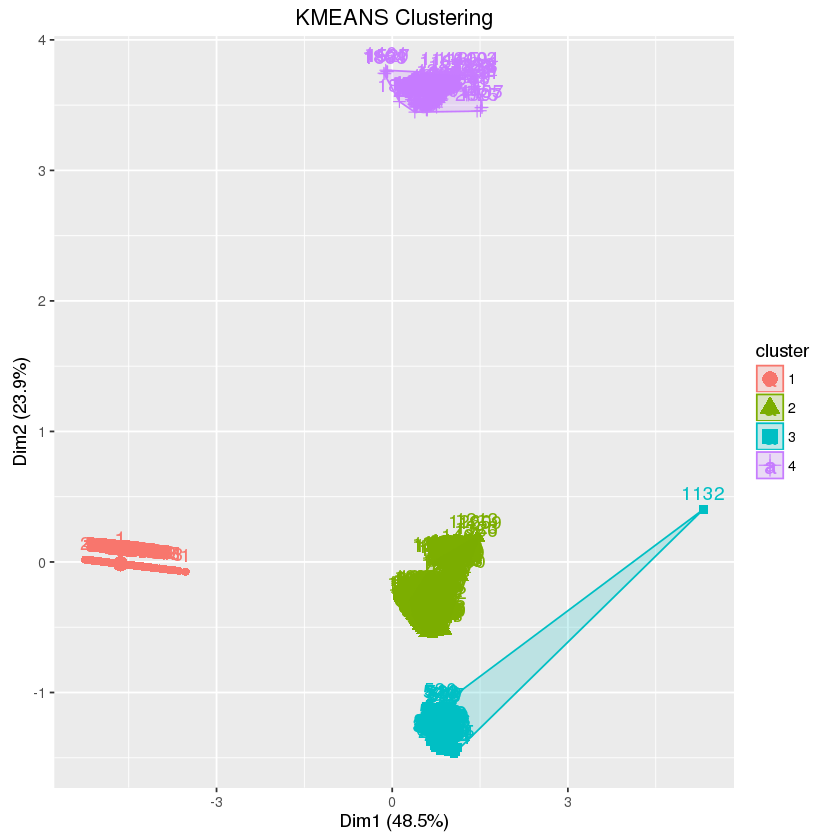

In [356]:
res.km <- select(df_cluster, 
           vessel_flow_presence, 
           io_cond_presence, 
           norm_pip_Temperature,
           norm_io_temperature,
           norm_io_dirtiness,
           norm_cs_voltage,
           norm_delta_pressure ) %>% eclust("kmeans", k = 4, nstart = 10)
